In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A+stats.norm.rvs(scale=54,loc=11,size=100)

stats.bayes_mvs(A), '\n', stats.bayes_mvs(B)

((Mean(statistic=11.345546240764518, minmax=(6.674444343828724, 16.016648137700308)),
  Variance(statistic=807.758096583165, minmax=(635.8482009157664, 1016.9534807590378)),
  Std_dev(statistic=28.34793080975117, minmax=(25.216030633622065, 31.889708069517315))),
 '\n',
 (Mean(statistic=22.557496178167234, minmax=(12.889559900845594, 32.22543245548887)),
  Variance(statistic=3460.271660510607, minmax=(2723.844575897671, 4356.422206615191)),
  Std_dev(statistic=58.67266326225558, minmax=(52.19046441542431, 66.00319845746257))))

In [3]:
stats.mannwhitneyu(A, B)

MannwhitneyuResult(statistic=4343.0, pvalue=0.054347680446611354)

В двух выборках существенно отличается дисперсия, поэтому используем тест Манна-Уитни. Согласно этому тесту, нулевая гипотеза об отустсвии различий между группами не может быть отвергнута с уровнем значимости в p=0,05.

#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [4]:
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A+stats.norm.rvs(scale=54,loc=11,size=100)

stats.wilcoxon(A, B)

WilcoxonResult(statistic=2026.0, pvalue=0.08621255219588186)

Состояние пациентов до и после получения препаратов статистически значимо различалось.

#### 3.
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 

In [5]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

Text(0.5, 1.0, 'minerals')

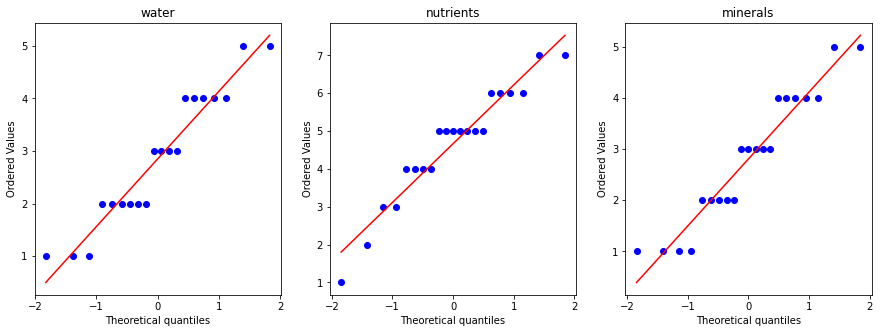

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

_ = stats.probplot(water, plot=ax1)
ax1.set_title('water')
_ = stats.probplot(nutri, plot=ax2)
ax2.set_title('nutrients')
_ = stats.probplot(mineral, plot=ax3)
ax3.set_title('minerals')

In [7]:
stats.bayes_mvs(water), '\n', stats.bayes_mvs(nutri), '\n', stats.bayes_mvs(mineral)

((Mean(statistic=2.85, minmax=(2.3597222764747796, 3.3402777235252206)),
  Variance(statistic=1.7970588235294116, minmax=(1.0134845796771152, 3.0196659633794076)),
  Std_dev(statistic=1.3209857450821925, minmax=(1.0067197125700458, 1.7377186088027623))),
 '\n',
 (Mean(statistic=4.666666666666667, minmax=(4.091760585693072, 5.241572747640262)),
  Variance(statistic=2.5925925925925926, minmax=(1.4857059403827295, 4.3007536460993085)),
  Std_dev(statistic=1.5879556232954561, minmax=(1.218895377127475, 2.0738258475820257))),
 '\n',
 (Mean(statistic=2.8095238095238093, minmax=(2.324334106087279, 3.2947135129603398)),
  Variance(statistic=1.8465608465608463, minmax=(1.05818647590525, 3.063189841813588)),
  Std_dev(statistic=1.3401488407155664, minmax=(1.0286819119170172, 1.7501970865629928))))

Все три выборки имеют распределение близкое к нормальному. Дисперсия в них достаточно сходная. Будем использовать ANOVA.

In [8]:
stats.f_oneway(water, nutri, mineral)

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

ANOVA показывает, что результаты эксперимента различаются в разных группах с высокой достоверностью (p<0,001).

In [9]:
stats.ttest_ind(nutri, mineral)

Ttest_indResult(statistic=4.257784009579262, pvalue=0.00012136733401245426)

Группа, которую поливали удобрением имеет статистически более высокие показатели, чем группа, которую поливали минералкой.

### Cookie Cats case

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

In [10]:
data = pd.read_csv('cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [11]:
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Примерно одинаковое количество пользователей поличило игру с воротами на 30 и 40 уровнях. Датасет уравновешен, все статистические тесты в таких условиях показывают максимальную чувствительность.

#### Сравним количество игровых раундов у пользователей с различными версиями игры

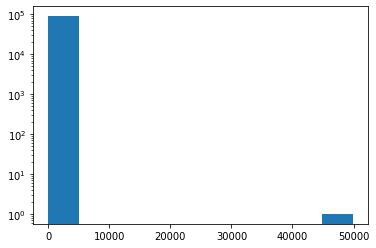

In [12]:
plt.hist(data['sum_gamerounds'])
plt.yscale('log')

В количестве уровней явно есть выброс. Возможно, кто-то использовал бота для прохождения игры. В любом случае точка с количеством раундов больше 10_000 нерепрезентативна, отбросим её.

In [13]:
indexNames = data[data['sum_gamerounds'] >10_000].index
data.drop(indexNames, inplace=True)

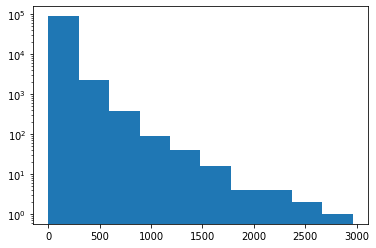

In [14]:
plt.hist(data['sum_gamerounds'])
plt.yscale('log')

In [15]:
plot_30 = data[data['version'] == 'gate_30']['sum_gamerounds']  #.groupby('sum_gamerounds')['userid'].count()
plot_40 = data[data['version'] == 'gate_40']['sum_gamerounds']  #.groupby('sum_gamerounds')['userid'].count()

print(f'Median in 30_gate group: {plot_30.median():.2f}')
print(f' median in 40_gate group: {plot_40.median():.2f}')

Median in 30_gate group: 17.00
 median in 40_gate group: 16.00


Распределение данных существенно отличается от нормального, применяем критерий Манна-Уитни

In [16]:
stats.mannwhitneyu(plot_30, plot_40)

MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

Пользователи, получившие версию игры с воротами на 30 уровне, проводили несколько больше игровых раундов, чем те, что получили игру с воротами на 40 уровне. Эта разница статистически значима.

#### Сравним доли пользователей, вернувшихся через один деть после установки

In [17]:
data['retention_1'].value_counts()

False    50035
True     40153
Name: retention_1, dtype: int64

In [18]:
retention_1 = promotion_left = pd.get_dummies(data['retention_1'])
retention_1.columns = 'missed', 'retended'
retention_1['version'] = data['version']
table = pd.pivot_table(
    retention_1, values=['retended', 'missed'],
    index='version', aggfunc=np.sum
)
table

,missed,retended
version,,
gate_30,24665.0,20034.0
gate_40,25370.0,20119.0


In [19]:
stats.fisher_exact(table)

(0.9763361587626617, 0.07470295381749956)

In [20]:
table['retended']/(table['missed'] + table['retended'])*100

version
gate_30    44.819795
gate_40    44.228275
dtype: float64

Доля пользователей, вернувшихся в игру через день установки, немного больше среди тех, кто получил версию с воротами на 30 уровне. Но эта разница не имеет статистической значимости.

#### Сравним доли пользователей, вернувшихся через семь дней после установки

In [21]:
retention_7 = promotion_left = pd.get_dummies(data['retention_7'])
retention_7.columns = 'missed', 'retended'
retention_7['version'] = data['version']
table = pd.pivot_table(
    retention_7, values=['retended', 'missed'],
    index='version', aggfunc=np.sum
)
table

,missed,retended
version,,
gate_30,36198.0,8501.0
gate_40,37210.0,8279.0


In [22]:
stats.fisher_exact(table)

(0.947398673017617, 0.0016378383111161233)

In [23]:
table['retended']/(table['missed'] + table['retended'])*100

version
gate_30    19.018323
gate_40    18.200004
dtype: float64

На 7 день после установки вернулось 19% пользователей, получивших версию игры с воротами на 30 уровне и 18% тех, кто получил игру с воротами на 40 уровне. Эта разница статистически значима (p=0,0016) согласно точному тесту Фишера.

В целом, игроки, получившие ворота на 30 уровне, проводили в игре больше времени и с большей вероятностью возвращались туда через день и через неделю после установки, по сравнению с теми пользователями, кто увидел ворота на 40м уровне. Разница в метриках между версиями игры невелика, но в случае вероятности возвращения в игру через 7 суток статистически достоверна.